In [1]:
%matplotlib inline
import cv2
import matplotlib.pyplot as plt
import numpy as np

Загружаем картинку

In [2]:
img_path = 'whiteballssample.jpg'
img = cv2.imread(img_path)

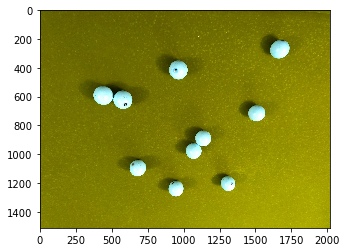

In [3]:
plt.imshow(img)

Конвертируем в grayscale

In [4]:
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

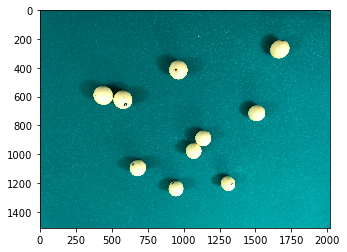

In [5]:
plt.imshow(img)

In [6]:
gray = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)

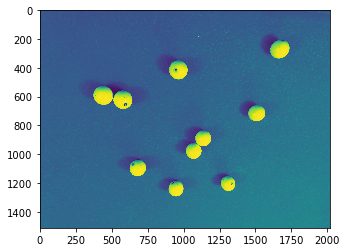

In [7]:
plt.imshow(gray)

Бинаризуем изображение

In [8]:
ret, thresh = cv2.threshold(gray, 150, 255, cv2.THRESH_BINARY)

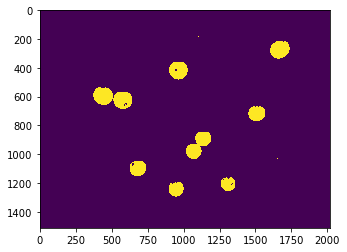

In [9]:
plt.imshow(thresh)

Применяем морфологические операции

In [10]:
kernel = np.ones((5,5),np.uint8)
morh_img = cv2.morphologyEx(thresh, cv2.MORPH_OPEN, kernel)

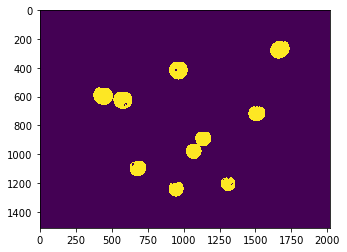

In [11]:
plt.imshow(morh_img)

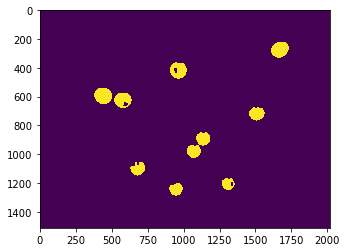

In [12]:
kernel = np.ones((3, 3),np.uint8)
erosion = cv2.erode(morh_img, kernel, iterations = 5)
plt.imshow(erosion)

Ищем контуры кругов на изображении

In [13]:
contours, hierarchy = cv2.findContours(erosion, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

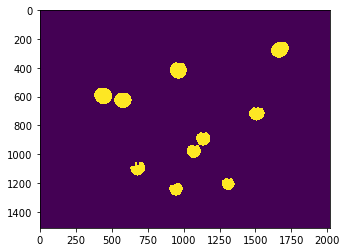

In [14]:
tmp_img = np.zeros_like(erosion, dtype=np.uint8)
cv2.drawContours(tmp_img, contours, -1, 255, cv2.FILLED)
plt.imshow(tmp_img)

Считаем количество шаров

In [17]:
print(f"Количество шаров на картинке: {len(contours)}")

Количество шаров на картинке: 10


Ищем радиус шаров и рисуем на отдельном изображении полученные шары

In [18]:
circles_radiuses = []
tmp_img = np.zeros_like(erosion, dtype=np.int8)
for c in contours:
    ((x, y), r) = cv2.minEnclosingCircle(c)
    cv2.circle(tmp_img, (int(x), int(y)), int(r),255, 2)
    circles_radiuses.append(r)

print(f"Средний радиус шаров: {np.mean(circles_radiuses)}")
print(f"Дисперсия: {np.var(circles_radiuses)}")

Средний радиус шаров: 55.00175170898437
Дисперсия: 39.86842165104114


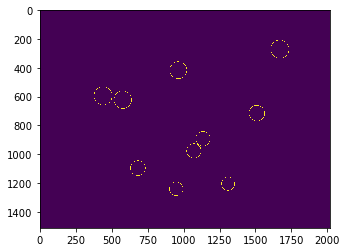

In [19]:
plt.imshow(tmp_img)